In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.cm import coolwarm
import numpy as np

In [2]:
# Read the CSV file into a DataFrame
summary_result_path = "../../exp_results/result_summary.csv"
df = pd.read_csv(summary_result_path, sep=",")

# Group the data by 'numTasks' and 'utilization' and calculate the average values
grouped_data = df.groupby(['numTasks', 'utilization'])[['simulator_timeConsumption(us)', 'proposed_timeConsumption(us)']].mean().reset_index()

# Calculate the gap between 'simulator_timeConsumption' and 'proposed_timeConsumption'
grouped_data['timeConsumptionGap'] = grouped_data['simulator_timeConsumption(us)'] - grouped_data['proposed_timeConsumption(us)']

# Create a pivot table to make it easier to plot
pivot_proposed = grouped_data.pivot(index='numTasks', columns='utilization', values='proposed_timeConsumption(us)')
pivot_simulator = grouped_data.pivot(index='numTasks', columns='utilization', values='simulator_timeConsumption(us)')
pivot_gap = grouped_data.pivot(index='numTasks', columns='utilization', values='timeConsumptionGap')


In [3]:
# Create a table that contains the average time consumption of the proposed method and the simulator
table = pd.DataFrame(columns=['numTasks', 'utilization', 'proposed_timeConsumption(us)', 'simulator_timeConsumption(us)', 'timeConsumptionGap'])
table['numTasks'] = grouped_data['numTasks']
table['utilization'] = grouped_data['utilization']
table['proposed_timeConsumption(us)'] = grouped_data['proposed_timeConsumption(us)']
table['simulator_timeConsumption(us)'] = grouped_data['simulator_timeConsumption(us)']
table['timeConsumptionGap'] = grouped_data['timeConsumptionGap']
table = table.round(2)

print(table)
table.to_csv('../../exp_results/time_consumption_summary.csv', index=False)

   numTasks  utilization  proposed_timeConsumption(us)   
0         3          0.2                         333.0  \

   simulator_timeConsumption(us)  timeConsumptionGap  
0                        75588.5             75255.5  


In [4]:
# a heatmap to show a gap between simulator and proposed
def plot_heatmap(pivot, title, label):
    plt.figure(figsize=(6, 3))
    plt.imshow(pivot, cmap='coolwarm', aspect='auto', interpolation='nearest')
    plt.title(title)
    plt.colorbar(label=label)
    plt.xlabel('Utilization')
    plt.ylabel('Number of Tasks')
    plt.xticks(range(len(pivot.columns)), pivot.columns, rotation=45)
    plt.yticks(range(len(pivot.index)), pivot.index)
    plt.tight_layout()
    plt.show()

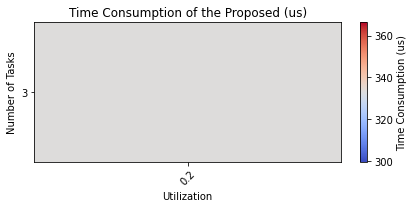

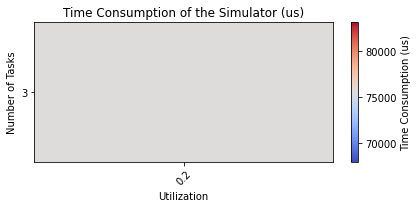

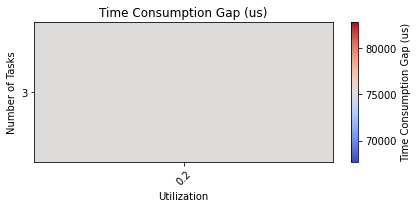

In [5]:
plot_heatmap(pivot_proposed, "Time Consumption of the Proposed (us)", "Time Consumption (us)")
plot_heatmap(pivot_simulator, "Time Consumption of the Simulator (us)", "Time Consumption (us)")
plot_heatmap(pivot_gap, "Time Consumption Gap (us)", "Time Consumption Gap (us)")

In [6]:
# Create a 3D plot to show the relationship between 'numTasks', 'utilization', and 'timeConsumptionGap'
def creat3Dplot(z, z_label, title):
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')

    x = grouped_data['numTasks']
    y = grouped_data['utilization']

    scatter = ax.scatter(x, y, z, c=z, cmap=coolwarm, marker='o')
    ax.set_xlabel('Number of Tasks')
    ax.set_ylabel('Utilization')
    ax.set_zlabel(z_label)
    ax.set_title(title)

    # Add a colorbar
    cbar = fig.colorbar(scatter, ax=ax, pad=0.1)
    cbar.set_label(z_label)

    plt.show()

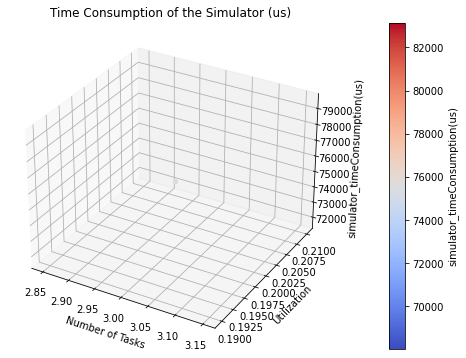

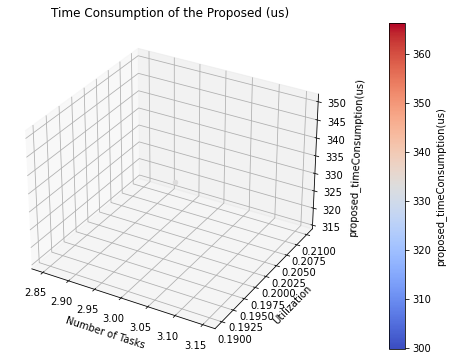

In [7]:
creat3Dplot(grouped_data['simulator_timeConsumption(us)'], 'simulator_timeConsumption(us)', 'Time Consumption of the Simulator (us)')
creat3Dplot(grouped_data['proposed_timeConsumption(us)'], 'proposed_timeConsumption(us)', 'Time Consumption of the Proposed (us)')
# creat3Dplot(grouped_data_filtered['simulator_timeConsumption(us)'] - grouped_data['proposed_timeConsumption(us)'], 'timeConsumption Gap(us)', 'Time Consumption Gap (us)')

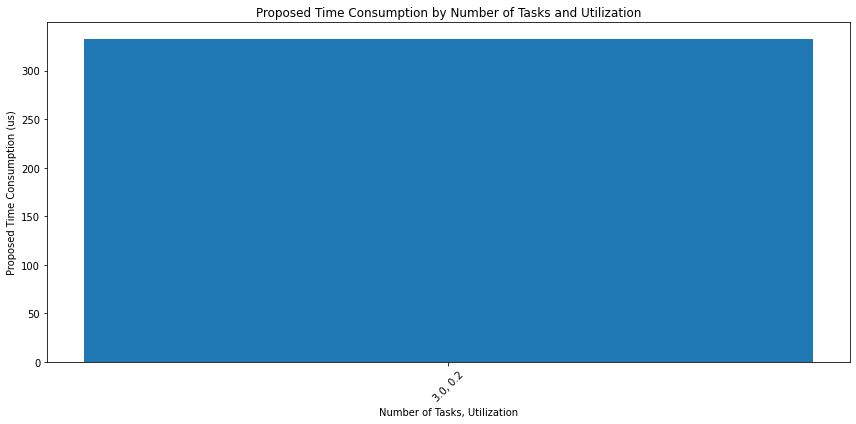

In [8]:
# Create a bar chart to show the relationship between 'numTasks' and 'utilization' and 'proposed_timeConsumption'
plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
y = grouped_data['proposed_timeConsumption(us)']

# Create labels for the x-axis by combining 'numTasks' and 'utilization'
x_labels = [f'{num_tasks}, {utilization}' for num_tasks, utilization in grouped_data[['numTasks', 'utilization']].values]

plt.bar(x, y)
plt.xlabel('Number of Tasks, Utilization')
plt.ylabel('Proposed Time Consumption (us)')
plt.title('Proposed Time Consumption by Number of Tasks and Utilization')
plt.xticks(x, x_labels, rotation=45)
plt.tight_layout()
plt.show()

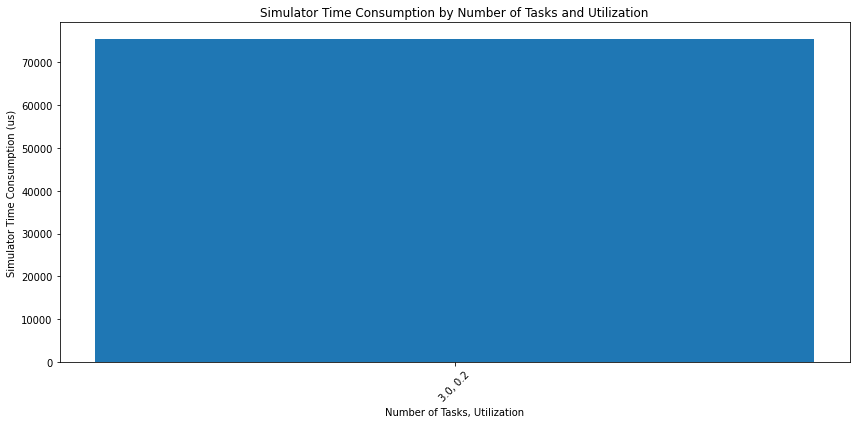

In [9]:
# Create a bar chart to show the relationship between 'numTasks' and 'utilization' and 'proposed_timeConsumption'
plt.figure(figsize=(12, 6))
x = range(len(grouped_data))
y = grouped_data['simulator_timeConsumption(us)']

# Create labels for the x-axis by combining 'numTasks' and 'utilization'
x_labels = [f'{num_tasks}, {utilization}' for num_tasks, utilization in grouped_data[['numTasks', 'utilization']].values]

plt.bar(x, y)
plt.xlabel('Number of Tasks, Utilization')
plt.ylabel('Simulator Time Consumption (us)')
plt.title('Simulator Time Consumption by Number of Tasks and Utilization')
plt.xticks(x, x_labels, rotation=45)
plt.tight_layout()
plt.show()

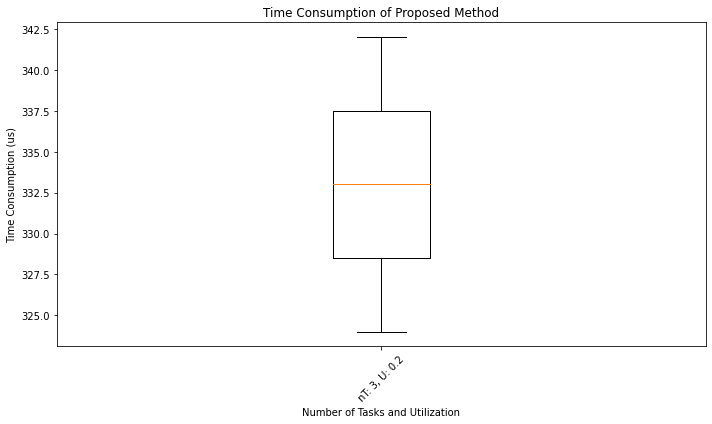

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "../../exp_results/result_summary.csv"
data = pd.read_csv(file_path)

# Group the data by the number of tasks and utilization
grouped_data = data.groupby(['numTasks', 'utilization'])

# Prepare the data for the box plot
boxplot_data = []
labels = []

for (numTasks, utilization), group in grouped_data:
        time_consumption = group['proposed_timeConsumption(us)']
        boxplot_data.append(time_consumption)
        labels.append(f"nT: {numTasks}, U: {utilization}")

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('Number of Tasks and Utilization')
plt.ylabel('Time Consumption (us)')
plt.title('Time Consumption of Proposed Method')
plt.tight_layout()

# Display the plot
plt.show()


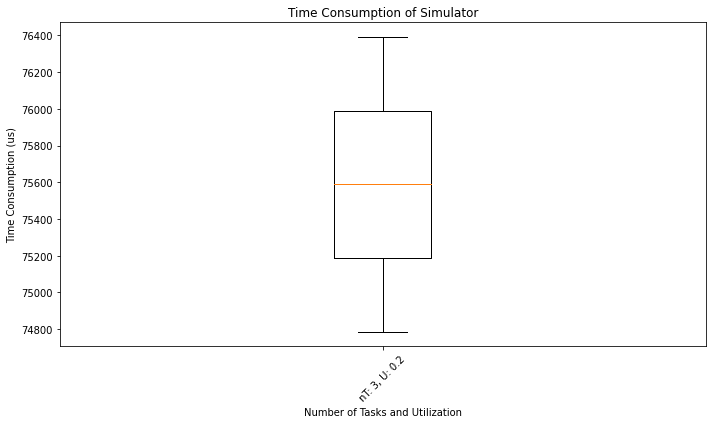

In [11]:
# Prepare the data for the box plot
boxplot_data = []
labels = []

for (numTasks, utilization), group in grouped_data:
        time_consumption = group['simulator_timeConsumption(us)']
        boxplot_data.append(time_consumption)
        labels.append(f"nT: {numTasks}, U: {utilization}")

# Create the box plot
plt.figure(figsize=(10, 6))
plt.boxplot(boxplot_data, labels=labels, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel('Number of Tasks and Utilization')
plt.ylabel('Time Consumption (us)')
plt.title('Time Consumption of Simulator')
plt.tight_layout()

# Display the plot
plt.show()
